<a href="https://colab.research.google.com/github/st064560/JB-tasks/blob/master/Retention_01_10_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#представим данные в виду датафрэйма
df_2017 = pd.read_excel('/content/rfm_ord_2017.xlsx')
df_2018 = pd.read_excel('/content/rfm_ord_2018.xlsx')
df_2019 = pd.read_excel('/content/rfm_ord_2019.xlsx')
df_2020 = pd.read_excel('/content/rfm_ord_2020.xlsx')


In [3]:
df = pd.concat([df_2017, df_2018, df_2019, df_2020], axis=0)

In [4]:
df.head()

,InvoiceNo,InvoiceDate,Status,email,UnitPrice
0,130696101,2017-01-01,complete,taguhi100@gmail.com,2112.50
1,130696108,2017-01-01,complete,sv-volchkovA@mail.ru,2112.50
2,130696121,2017-01-01,complete,bast@bk.ru,11759.99
3,130696132,2017-01-01,complete,akira_72@mail.ru,1835.44
4,130696148,2017-01-01,complete,oon-1986@mail.ru,2572.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269378 entries, 0 to 61003
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    269378 non-null  object        
 1   InvoiceDate  269378 non-null  datetime64[ns]
 2   Status       269378 non-null  object        
 3   email        269378 non-null  object        
 4   UnitPrice    269378 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 12.3+ MB


In [6]:
df.describe()

,UnitPrice
count,269378.000000
mean,2981.736209
std,2483.431095
min,0.000000
25%,1300.830000
50%,2721.670000
75%,4081.670000
max,83102.505600


In [7]:
df['ID'] = df['email'].astype('category').cat.codes 
df

,InvoiceNo,InvoiceDate,Status,email,UnitPrice,ID
0,130696101,2017-01-01 00:00:00,complete,taguhi100@gmail.com,2112.50,136904
1,130696108,2017-01-01 00:00:00,complete,sv-volchkovA@mail.ru,2112.50,134354
2,130696121,2017-01-01 00:00:00,complete,bast@bk.ru,11759.99,32896
3,130696132,2017-01-01 00:00:00,complete,akira_72@mail.ru,1835.44,19808
4,130696148,2017-01-01 00:00:00,complete,oon-1986@mail.ru,2572.94,114293
...,...,...,...,...,...,...
60999,132724566,2020-09-25 15:07:40,Заказ передан в курьерскую службу,nati1988.09@gmail.com,3799.00,105238
61000,132724583,2020-09-25 15:08:51,Заказ передан в курьерскую службу,aftabithm@yandex.ru,3463.00,19055
61001,132724587,2020-09-25 15:12:00,Заказ в обработке,spiridon4ikova@mail.ru,4025.00,132256
61002,132724593,2020-09-25 15:16:09,Заказ в обработке,vinter.a@mail.ru,4393.00,148329


In [8]:
df.ID.value_counts()

8788      80
125267    77
86165     70
81266     60
103619    59
          ..
57474      1
59523      1
53380      1
55429      1
0          1
Name: ID, Length: 157227, dtype: int64

In [9]:
df = df.rename(columns={"InvoiceNo": "order", "InvoiceDate": "order_date",  "UnitPrice": "price"})

In [11]:
df['ID'] = df['ID'].astype(int)

In [13]:
n_orders = df.groupby(['ID'])['order'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['ID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

25.79% of customers ordered more than once.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [15]:
mn = df

In [16]:
mn['order_month'] = mn['order_date'].dt.to_period('Q')
mn['cohort'] = mn.groupby('ID')['order_date'] \
                 .transform('min') \
                 .dt.to_period('Q') 

In [17]:
mn_cohort = mn.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('ID', 'nunique')) \
              .reset_index(drop=False)
mn_cohort['period_number'] = (mn_cohort.order_month - mn_cohort.cohort).apply(attrgetter('n'))
mn_cohort

,cohort,order_month,n_customers,period_number
0,2017Q1,2017Q1,11155,0
1,2017Q1,2017Q2,1872,1
2,2017Q1,2017Q3,1749,2
3,2017Q1,2017Q4,1900,3
4,2017Q1,2018Q1,1782,4
...,...,...,...,...
115,2020Q1,2020Q2,982,1
116,2020Q1,2020Q3,735,2
117,2020Q2,2020Q2,12040,0
118,2020Q2,2020Q3,1315,1


In [18]:
mn_cohort.to_excel('ret_table_01.10.xlsx')

In [19]:
cohort_pivot = mn_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort,,,,,,,,,,,,,,,
2017Q1,11155.0,1872.0,1749.0,1900.0,1782.0,1254.0,1469.0,1310.0,1117.0,890.0,1024.0,1087.0,1043.0,653.0,697.0
2017Q2,6898.0,847.0,1036.0,865.0,678.0,694.0,614.0,500.0,467.0,495.0,520.0,488.0,330.0,323.0,NaN
2017Q3,5173.0,740.0,694.0,445.0,562.0,479.0,377.0,300.0,355.0,389.0,376.0,222.0,251.0,NaN,NaN
2017Q4,11385.0,1003.0,720.0,772.0,795.0,541.0,415.0,508.0,583.0,497.0,335.0,354.0,NaN,NaN,NaN
2018Q1,7566.0,747.0,776.0,694.0,577.0,451.0,503.0,523.0,544.0,335.0,312.0,NaN,NaN,NaN,NaN
2018Q2,7684.0,1040.0,750.0,523.0,473.0,467.0,502.0,486.0,316.0,278.0,NaN,NaN,NaN,NaN,NaN
2018Q3,29707.0,1283.0,808.0,600.0,634.0,691.0,656.0,395.0,380.0,NaN,NaN,NaN,NaN,NaN,NaN
2018Q4,20369.0,1236.0,882.0,868.0,1001.0,832.0,495.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019Q1,5677.0,769.0,686.0,663.0,628.0,376.0,347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
cohort_pivot.to_excel('ret_matrix_01.10.xlsx')

In [21]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [22]:
retention_matrix.to_excel('ret_perc_01.10.xlsx')

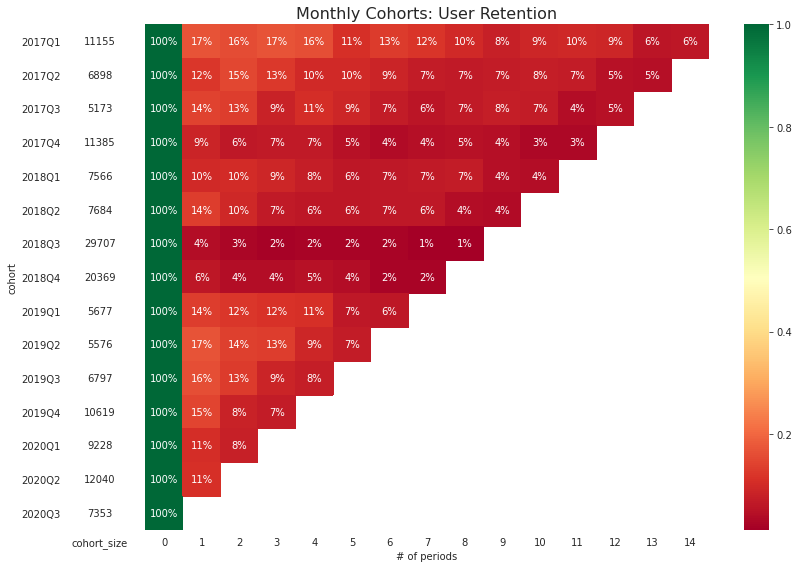

In [23]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()